In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix

# Import the data set

In [19]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
data['species'],categories = pd.factorize(data['species'])

In [21]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Check the null value

In [22]:
data.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


# Visualisation of data set "3D scatter plot"

3D scatter plot give us better glimpse of iris flowers more inclined toward length of the petals and width of the sepals

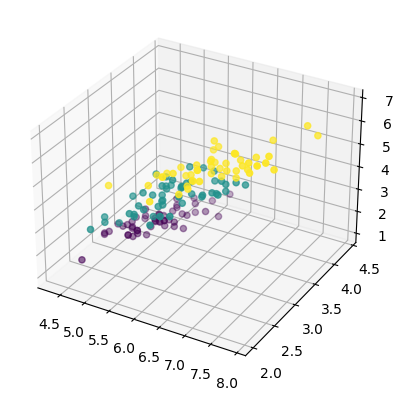

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['sepal_length'], data['sepal_width'], data['petal_length'], c=data['species'])
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

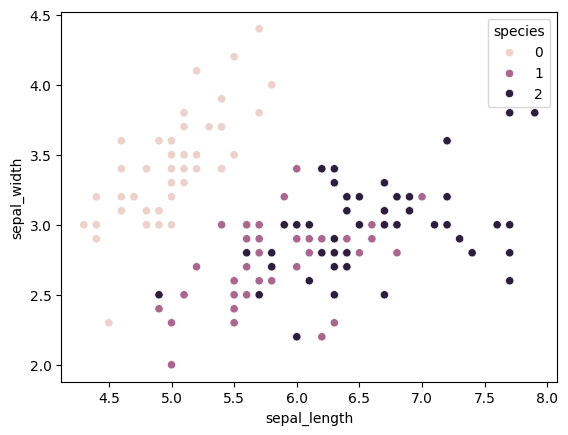

In [24]:
sns.scatterplot(data=data, x='sepal_length', y='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

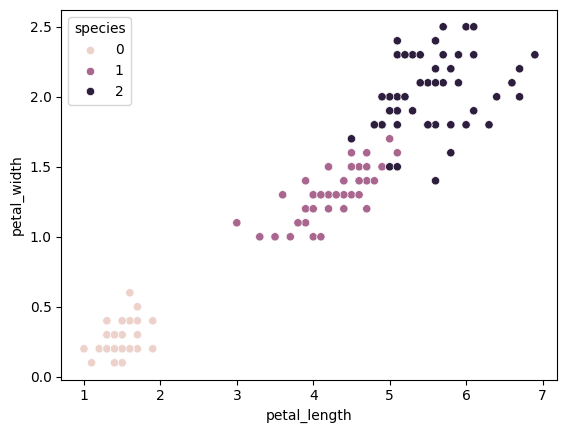

In [25]:
sns.scatterplot(data=data, x='petal_length', y='petal_width', hue='species')

# To determine optimal number of clustering use "Elbow Method"

In [26]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data.drop('species',axis=1))
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [27]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.40900974025975,
 29.988943950786066,
 28.456259740259753]

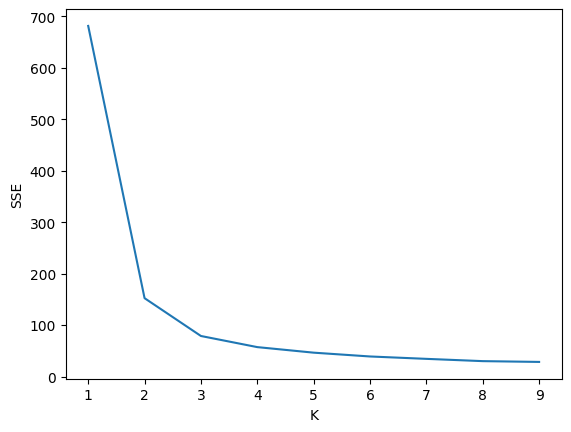

In [28]:
plt.k_rng = range(1,10)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

# Applying K-Mean Algorithm

In [29]:
mean = KMeans(n_clusters=3)
y_predict = km.fit_predict(data[['petal_length','petal_width']])
print(y_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 3 2 7 7 7 4 7 2 4 2 2 7 4 7 7 2 7 2 3 2 3 7
 2 7 7 3 7 4 2 4 2 3 7 7 7 7 2 2 7 7 2 4 2 2 2 2 4 2 8 3 8 6 8 5 7 6 6 8 3
 0 0 3 0 0 0 5 5 3 8 3 5 3 8 6 3 3 0 6 6 5 0 3 6 8 8 0 3 0 8 0 3 8 8 0 3 0
 0 3]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [30]:
data['cluster'] = y_predict
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


# Measure accuracy

In [31]:
cm = confusion_matrix(data['species'],data['cluster'])
cm

array([[ 0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  5,  7,  0,  0, 20,  0],
       [13,  0,  0, 13,  0,  5,  7,  1, 11],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [37]:
ture_label = data.species
predict_label = data.cluster
cm = confusion_matrix(ture_label,predict_label)
class_label = ['setosa','versicolor','virginica']

# For better visualisation of data

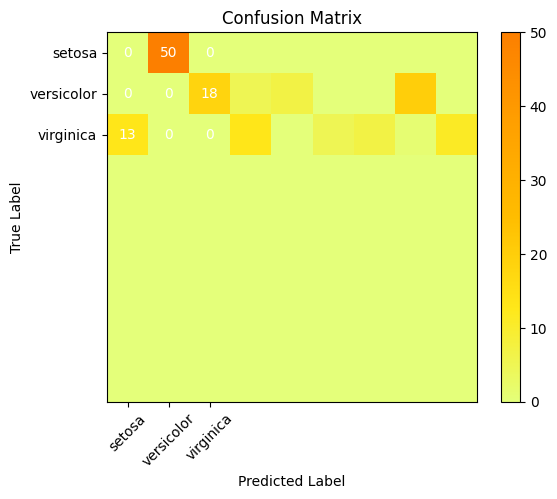

In [43]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_label))
plt.xticks(tick_marks,class_label,rotation=45)
plt.yticks(tick_marks,class_label)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(class_label)):
    for j in range(len(class_label)):
        plt.text(j,i,cm[i,j], ha='center', va='center', color='white')
plt.show()